In [11]:
import numpy as np
import pandas as pd
import scipy.stats as sy
import matplotlib.pyplot as plt
from sklearn import cluster as sc
from sklearn import feature_selection as sf
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import csv

scaler = StandardScaler()
data = pd.read_csv("final_data.csv", delimiter=',')
data.head()

,Q13A,Q13B,Q13C,Q13D,Q13E,Q13F,Q13G,Q16A,Q16B,Q16C,...,Q49_190-199,Q49_>200,Q49_0,Q50_<60,Q50_60-69,Q50_70-79,Q50_80-89,Q50_90-99,Q50_>100,Q50_0
0,False,False,False,False,False,True,False,True,False,False,...,0,0,0,0,0,0,1,0,0,0
1,False,False,False,False,False,True,False,False,False,False,...,1,0,0,0,0,0,1,0,0,0
2,True,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,1,0,0
3,False,False,False,False,False,True,False,True,False,False,...,0,0,0,0,0,0,1,0,0,0
4,False,False,False,False,False,True,False,True,False,False,...,0,0,0,0,1,0,0,0,0,0


array([14.86, 19.71, 23.28, 26.14, 28.46, 30.6 , 32.61, 34.58, 36.51,
       38.39, 40.21, 41.94, 43.63, 45.2 , 46.73, 48.26, 49.77, 51.22,
       52.66, 54.08, 55.43, 56.69, 57.93, 59.12, 60.29, 61.42, 62.52,
       63.61, 64.69, 65.75, 66.77, 67.73, 68.68, 69.59, 70.49, 71.37,
       72.24, 73.08, 73.91, 74.72, 75.52, 76.29, 77.06, 77.81, 78.53,
       79.25, 79.95, 80.64, 81.32, 81.98, 82.61, 83.24, 83.85, 84.46,
       85.04, 85.6 , 86.16, 86.7 , 87.23, 87.75, 88.26, 88.74, 89.22,
       89.69, 90.14, 90.58, 91.02, 91.45, 91.87, 92.26, 92.65, 93.03,
       93.4 , 93.76, 94.11, 94.45, 94.78, 95.09])

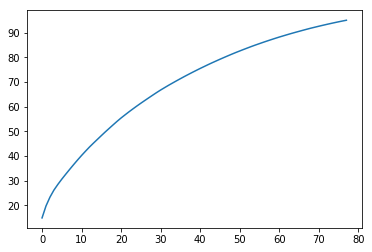

In [6]:
X = data.values
X = X.astype(float)
X_train = X[:401]
X_val = X[401:]

scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_val)
X_val = scaler.transform(X_val)

pca = PCA(.95)
pca.fit(X_train)
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)
var1
# feature0 = X[:,0].astype(int)
# MI0 = sf.mutual_info_classif(X[:,1:], feature0)
# print(np.shape(X[:,0]))

# pca = sd.PCA().fit(X)

# kmeans = cl.KMeans(n_clusters=4).fit(X)
# labels = kmeans.labels_
# print(labels)
# indices = [i for i, x in enumerate(labels) if x == 0]
# pd.options.display.max_columns = None
# print(data.iloc[indices])

In [10]:
X_train = pca.transform(X_train)
X_val = pca.transform(X_val)


array([[-2.46196329,  2.03990542,  2.43955831, ..., -0.90480851,
         0.39887599,  0.88964386],
       [-1.79976451,  1.29334406, -3.71004172, ..., -0.56280839,
         1.71281195,  0.96521531],
       [-2.74959029, -1.19690394, -2.02254614, ..., -0.23403929,
        -2.8608531 , -0.07788706],
       ...,
       [-2.30215673, -1.467734  , -1.97684695, ..., -0.82675972,
        -1.80082264, -0.83690956],
       [-2.92666569, -0.06438877, -2.69770249, ...,  0.18428392,
         1.59957148, -1.39831019],
       [ 9.24444121, -3.0853328 , -1.7143558 , ..., -1.31480954,
        -0.13798571, -0.18162535]])

In [8]:
pca_kmeans = sc.KMeans(n_clusters=3).fit(X_train)
kmeans = sc.KMeans(n_clusters=3).fit(X[:401])
pca_labels = pca_kmeans.labels_
labels = kmeans.labels_
print("pca_labels\n", pca_labels)
print("non pca labels\n", labels)

# plt.bar([0,1,2,3], pca_labels)
# plt.show()
# plt.bar([0,1,2,3], labels)
# plt.show()


pca_labels
 [0 1 1 0 0 1 2 1 0 1 1 1 1 1 0 0 2 2 1 1 1 0 1 0 1 1 2 2 0 0 1 1 1 1 1 0 2
 1 0 0 2 1 0 1 1 0 0 0 1 1 1 0 0 2 2 1 0 2 0 1 1 1 1 0 0 1 1 1 2 1 2 2 1 1
 2 2 1 1 1 0 1 0 2 1 1 1 1 0 0 1 1 0 1 2 0 0 1 1 1 1 1 0 0 1 1 1 1 2 1 1 2
 0 0 1 0 2 0 0 1 0 2 1 1 1 2 0 1 0 1 1 1 0 0 1 1 2 1 1 1 1 1 1 2 0 1 0 1 2
 0 0 0 1 1 1 1 2 1 0 1 0 1 1 0 1 1 1 1 1 2 1 1 2 0 0 2 0 1 1 0 1 2 1 0 0 2
 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 2 1 1 0 0 0 1 2 1 1 0 2 1 1 2 2 1 0 1 0
 2 1 1 2 1 1 1 0 1 1 2 1 2 1 2 0 1 1 2 0 1 1 0 1 0 0 0 1 0 1 1 2 2 2 0 1 1
 1 0 2 0 1 1 2 1 0 1 1 0 1 0 1 0 0 2 2 1 2 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0
 1 1 2 1 1 1 1 1 2 0 1 1 2 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 2 1 1 0 1 2 1 0 2
 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 2 0 1 0 1 2 0 1 1 2 1 0 2 1 1 2 1 0 1 1 2 1
 1 1 1 0 2 0 1 0 1 2 1 1 2 1 1 0 1 0 1 0 1 2 2 1 1 1 1 1 2 1 1]
non pca labels
 [0 2 2 0 0 2 1 2 0 2 2 2 2 2 0 0 1 1 2 2 2 0 2 0 2 2 1 1 0 0 2 2 2 2 2 0 1
 2 0 0 1 2 0 2 2 0 0 0 2 2 2 0 0 1 1 2 0 1 0 2 2 2 2 0 0 2 2 2 1 2 1 1 2 2
 1 1 2 2

In [9]:
# data = pd.read_csv("one_hot_data.csv", delimiter=',')
# manN = sum(data.Q47_Man)
# vrN = sum(data.Q47_Vrouw)

# Q13a = sum(data.Q13A)
# Q13b= sum(data.Q13B)
# Q13c= sum(data.Q13C)
# Q13d= sum(data.Q13D)
# Q13e= sum(data.Q13E)
# Q13f= sum(data.Q13F)
# Q13g= sum(data.Q13G)

# total = data.sum()
# total = list(total[2:])
# total
# # l = [manN, vrN, Q13a, Q13b, Q13c, Q13d, Q13e, Q13f, Q13g]

# sy.chisquare(total[:2])
data.head(20)

,Q13A,Q13B,Q13C,Q13D,Q13E,Q13F,Q13G,Q16A,Q16B,Q16C,...,Q49_190-199,Q49_>200,Q49_0,Q50_<60,Q50_60-69,Q50_70-79,Q50_80-89,Q50_90-99,Q50_>100,Q50_0
0,False,False,False,False,False,True,False,True,False,False,...,0,0,0,0,0,0,1,0,0,0
1,False,False,False,False,False,True,False,False,False,False,...,1,0,0,0,0,0,1,0,0,0
2,True,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,1,0,0
3,False,False,False,False,False,True,False,True,False,False,...,0,0,0,0,0,0,1,0,0,0
4,False,False,False,False,False,True,False,True,False,False,...,0,0,0,0,1,0,0,0,0,0
5,True,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,1,0,0,0
6,False,False,False,False,False,True,False,False,False,False,...,0,0,0,1,0,0,0,0,0,0
7,True,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,1,0,0,0
8,True,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,1,0,0,0,0
9,True,False,False,False,False,False,False,False,False,False,...,0,0,0,0,1,0,0,0,0,0
